# Salifort Motors Workforce Analysis: Employee Turnover Forecast

## Background Infomation

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their department, number of projects, average monthly hours, and any other data points you deem helpful.

## Step Approach

We will use follow PACE framework for this projects:

### Plan

- **Objective:** To develop a predictive model that forecasts employee turnover at Salifort Motors based on key factors such as department, number of projects, average monthly hours, and other relevant data points.
- **Scope:** The model will focus on classifying employees into categories of 'likely to leave' or 'likely to stay'. Additional parameters like employee satisfaction, experience, and performance ratings may be considered.
- **Data Requirements:** For the data set provided by Google, for the column explanation, see Course7 -> README.
- **Stakeholders:** Senior leadership team, HR department, departmental managers, etc.

### Analyze

- **Data Cleaning:** Address missing values, outliers, and duplicates in the given data, ensure data types are appropriate for analysis.
- **Data Processing:** Transform categorical data into a format suitable for modeling.
- **Exploratory Data Analysis (EDA):** Conduct an initial analysis to understand the distribution of key variables, identify patterns, and detect any anomalies or interesting correlations.
- **Feature Selection:** Determine which variables are most relevant for predicting employee turnover. This involve statistical tests and correlation analysis.

### Construct

- **Model Selection:**
    - Decision Tree model: Justify the choice based on the model's simplicity, interpretability, and suitability for the data.
    - Random Forest model: Expand the predictive capacity by leveraging an ensemble method that improves accuracy and controls overfitting better than a single decision tree.
    - XGBoost model: Implement this advanced gradient boosting algorithm for its efficiency, effectiveness, and ability to handle a wide variety of data science problems.
    - K Means: Employ K-means clustering to identify patterns of employee engagement.
 - **Validation:**
    - For the Decision Tree, continue to split the data into training and testing sets to validate the model's performance. Use metrics like K-Fold Cross-Validation and GridSearch for optimization.
    - For the Random Forest and XGBoost models, additionally apply techniques such as feature importance and parameter tuning to refine the models and improve accuracy.
- **Parameter Tuning:** 
    - Use GridSearchCV for the Random Forest to explore a wide range of combinations and identify the best hyperparameters for the ensemble.
    - For XGBoost, we can apply a more targeted approach with RandomizedSearchCV, focusing on key parameters like learning rate, max depth, and number of estimators.


### Execute

- **Results Interpretation:** Analyze the results to identify the most significant predictors of employee turnover. Understand how different variables interact and influence the outcome.
- **Conclusion and Recommendations:** Draw conclusions based on the model's findings. Propose actionable recommendations for reducing employee turnover.
- **Feedback and Iteration:** Provide feedback to stakeholders to make the company better - reduce the employee churn rate. 

### What's next...
- **Performance Evaluation:** Evaluate the Decision Tree model to pinpoint where enhancements are needed.
- **Model Expansion:** Integrate advanced models such as Random Forest and XGBoost, which offer a more robust framework for handling complex datasets and feature interactions.
- **Deployment Preparation:** Prepare the refined models for deployment, ensuring they are tuned for optimal performance in a production environment.





## **PLAN**

### 1.1 Plan

- **Objective:** To develop a predictive model that forecasts employee leaving rate at Salifort Motors based on key factors such as department, number of projects, average monthly hours, and other relevant data points.
- **Scope:** The model will focus on classifying employees into categories of 'likely to leave' or 'likely to stay'. Additional parameters like employee satisfaction, experience, and performance ratings may be considered.
- **Data Requirements:** For the data set provided by Google, for the column explanation, see Course7 -> README.
- **Stakeholders:** Senior leadership team, HR department, departmental managers, etc.

## **Analyze**

- **Data Cleaning:** Address missing values, outliers, and duplicates in the given data, ensure data types are appropriate for analysis.
- **Data Processing:** Transform categorical data into a format suitable for modeling.
- **Exploratory Data Analysis (EDA):** Conduct an initial analysis to understand the distribution of key variables, identify patterns, and detect any anomalies or interesting correlations.
- **Feature Selection:** Determine which variables are most relevant for predicting employee turnover. This involve statistical tests and correlation analysis.

### 2.1 Import, Load and Examine 

We will import packages we need throughout projects.

In [1]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, \
precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.calibration import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import randint
import xgboost as xgb
from xgboost import XGBClassifier

/tmp/ipykernel_3221/1243944519.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load Dataset
df = pd.read_csv("HR_capstone_dataset.csv")
df 

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_performance_rating   14999 non-null  float64
 2   number_of_projects        14999 non-null  int64  
 3   avg_monthly_hours         14999 non-null  int64  
 4   years_at_company          14999 non-null  int64  
 5   had_work_accident         14999 non-null  int64  
 6   has_left_company          14999 non-null  int64  
 7   promoted_in_last_5_years  14999 non-null  int64  
 8   Department                14999 non-null  object 
 9   salary_level              14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Get descriptive statistics about the data
df.describe()

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2.2 Data Cleaning

Before starting the analysis, I want to change the `satisfaction_level` and `last_performance_rating` scale from 1 to 10, and this is more straightforward and easy, and also prepre for modeling (although scaling does not affect the model's ability to detect patterns or relationships).


In [5]:
# Change number scale to 10
df["satisfaction_level"] = df["satisfaction_level"] * 10
df["last_performance_rating"] = df["last_performance_rating"] * 10
df

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,3.8,5.3,2,157,3,0,1,0,sales,low
1,8.0,8.6,5,262,6,0,1,0,sales,medium
2,1.1,8.8,7,272,4,0,1,0,sales,medium
3,7.2,8.7,5,223,5,0,1,0,sales,low
4,3.7,5.2,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,1,0,support,low
14995,3.7,4.8,2,160,3,0,1,0,support,low
14996,3.7,5.3,2,143,3,0,1,0,support,low
14997,1.1,9.6,6,280,4,0,1,0,support,low



#### 2.2.1 Missing Value

From `info()` we can see that there are no missing values. 

#### 2.2.2 Outliers

Outliers refer to unreasonable values in the data. This unreasonable value usually requires one's own judgment on the data set to obtain it.

Based on the dataset provided, here is some consideration:

1. `had_work_accident, has_left_company, promoted_in_last_5_years`: Any value besides 0 and 1?
2. `satisfaction_level, last_performance_rating`: Any Value beside scale 0 to 10 (Since I expanded it)?
3. `department`: Any weird or non-existent department in the dataset?
4. `salary_level`: Any value besides "low, medium, high"? 

These are the things we should consider. Besides this, other columns look fine by examining the data before. 

In [6]:
# Check if "had_work_accident, has_left_company, promoted_in_last_5_years " has value besides 0 and 1
outlier_rows_1 = df[~df[["had_work_accident", "has_left_company", "promoted_in_last_5_years"]].isin([0, 1]).all(axis=1)]
outlier_count_1 = outlier_rows_1.shape[0]
print(outlier_count_1)

# Check if "satisfaction_level, last_performance_rating" has values outside the scale 0 to 10
outlier_count_2 = df[(df["satisfaction_level"] < 0) | (df["satisfaction_level"] > 10) | \
                     (df["last_performance_rating"] < 0) | (df["last_performance_rating"] > 10)]
print(outlier_count_2)

# Check "department" columns
print(df["Department"].value_counts().sum())

# Check "salary_level" columns
outlier_count_3 =  df[~df["salary_level"].isin(["low", "medium", "high"])].shape[0]
print(outlier_count_3)

0
Empty DataFrame
Columns: [satisfaction_level, last_performance_rating, number_of_projects, avg_monthly_hours, years_at_company, had_work_accident, has_left_company, promoted_in_last_5_years, Department, salary_level]
Index: []
14999
0


Great! No outliers found.

#### 2.2.3 Duplicates

In [7]:
# Check duplicates
df.duplicated().sum()

3008

There are 3008 duplicates, we need delete them.

In [8]:
# Drop duplicates
df = df.drop_duplicates()

### 2.3 Exploratory Data Analysis (EDA)

After we've done data cleaning/processing, we can now start the analysis. 

We will first check whether the employee has left the company. 

has_left_company
0    10000
1     1991
Name: count, dtype: int64

has_left_company
0    0.833959
1    0.166041
Name: proportion, dtype: float64


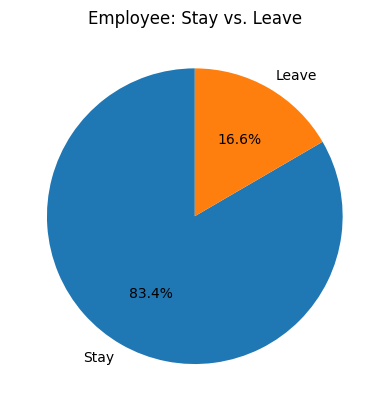

In [9]:
# Get employee data: stay vs. leave
count = df["has_left_company"].value_counts()
print(count)
print()
print(df["has_left_company"].value_counts(normalize=True))

# Visualization 
plt.pie(count, labels=["Stay", "Leave"], autopct="%1.1f%%", startangle=90)
plt.title("Employee: Stay vs. Leave");

Only about 16% of people leave, which seems normal. 

The question we are trying to find out is: **Why are employees leaving?**

Here is some approach: 

1. **Satisfaction and Performance:** Analyze the interaction between `satisfaction_level` and `last_performance_rating` with respect to `has_left_company`. 
2. **Tenure and Promotion:** Look at `years_at_company` alongside `promoted_in_last_5_years` to see if longer-tenured employees without promotions are more likely to leave. 
3. **Salary Level and Workload:** Investigate how `salary_level` interacts with `avg_monthly_hours` to influence turnover.
4. **Projects by Department:** Explore the `num_of_projects` assignments across `departments` and their impact on employee turnover.
5. **Comprehensive Analysis:** In the end, we will use a heatmap to represent all relationships.


#### 2.3.1 Satisfaction and Performance

Analyze the interaction between `satisfaction_level` and `last_performance_rating` with respect to `has_left_company`. 

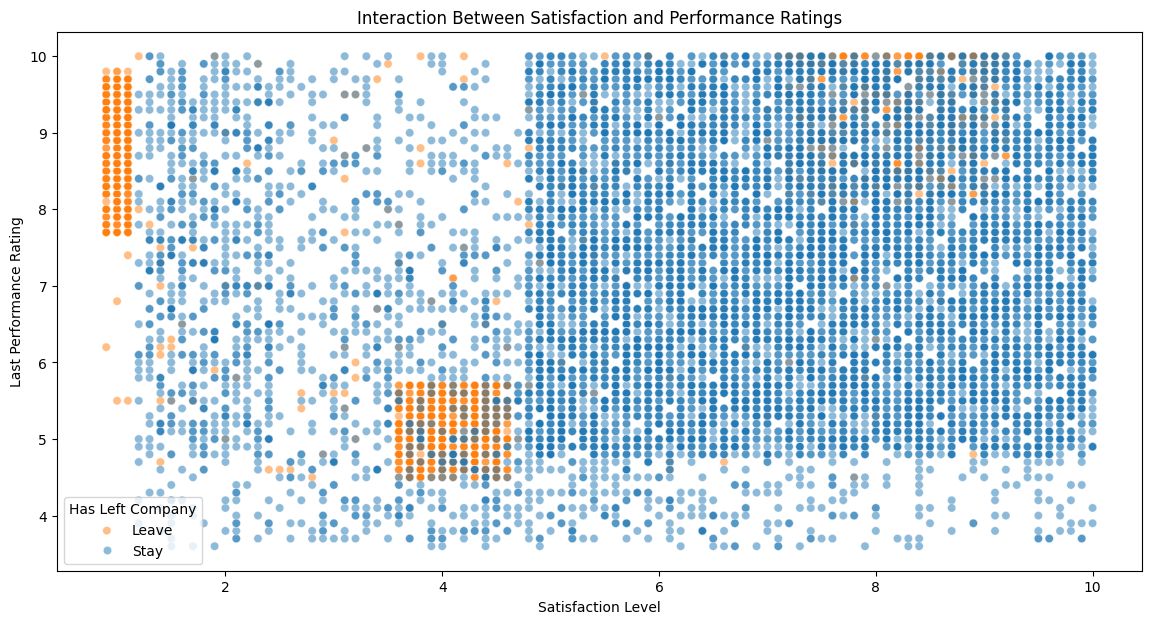

In [10]:
# Create scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x="satisfaction_level", y="last_performance_rating", hue="has_left_company", alpha=0.5)
plt.title("Interaction Between Satisfaction and Performance Ratings")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Performance Rating")
plt.legend(labels=["Leave", "Stay"], title="Has Left Company")
plt.show();


From the graph: 

- **High performance but low satisfaction:** The first block in the upper left corner shows that even well-performing employees may choose to leave if they are not satisfied. This may suggest that job satisfaction factors other than performance, such as work-life balance, recognition, or work environment, may contribute to turnover.

- **Low Performance and Low Satisfaction:** The second block indicates a group of employees with low satisfaction and low performance. This is simpler because low job satisfaction and poor performance are both common reasons why employees leave an organization.

- **Retention Strategies:** For the first group, strategies to increase job satisfaction may be effective for retention even without focusing on performance improvement. For the second group, interventions may need to address performance support and job satisfaction.

- **Further analysis:** These observations may lead to further analysis. For example, examine what specific aspects of job satisfaction a high-performing employee who left the company lacked, or understand the reasons behind the poor performance of a second group of employees.


#### 2.3.2 Tenure and Promotion

Look at `years_at_company` alongside `promoted_in_last_5_years` to see if longer-tenured employees without promotions are more likely to leave. 

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:640: F

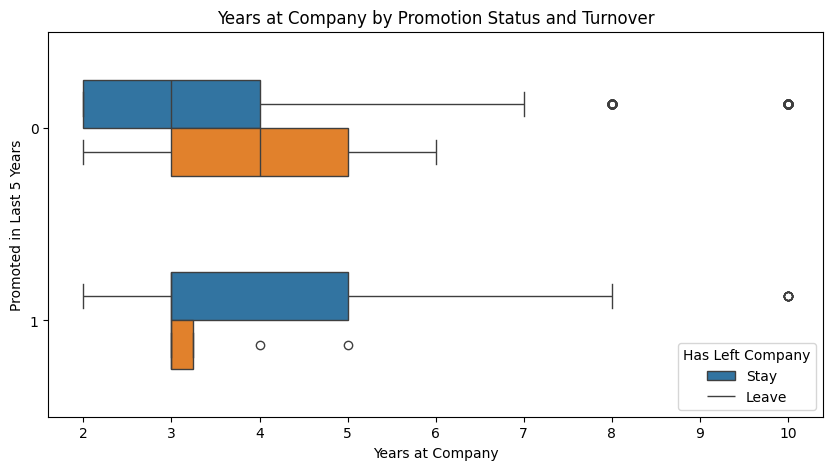

In [11]:
# Create boxplot
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x="years_at_company", y="promoted_in_last_5_years", hue="has_left_company", data=df, width=0.5, orient="h")
plt.title("Years at Company by Promotion Status and Turnover")
plt.xlabel("Years at Company")
plt.ylabel("Promoted in Last 5 Years")
boxplot.legend(labels=["Stay", "Leave"], title='Has Left Company')
plt.show();

From the graph:

- **Non-Promoted Employees:** For those who have not been promoted, the fact that employees who left had a higher median tenure than those who stayed could suggest that without the prospect of promotion, they might be willing to stay up to a certain point, after which they may start looking for better opportunities elsewhere.

- **Promoted Employees:** Among those who have been promoted, it seems that employees tend to leave after a relatively short period post-promotion. This could imply that promotions may no`t be sufficient to retain staff in the long term, or it could indicate a 'promotion paradox' where employees leave for external opportunities once they have been promoted.

- **Post-Promotion Turnover:** For promoted employees who leave, the organization might need to investigate if the reasons are related to the roles they are promoted into, dissatisfaction with the new position, or if the promotion encourages them to seek even more advanced opportunities outside the company.

#### 2.3.3 Salary Level and Workload

Investigate how `salary_level` interacts with `avg_monthly_hours` to influence turnover.

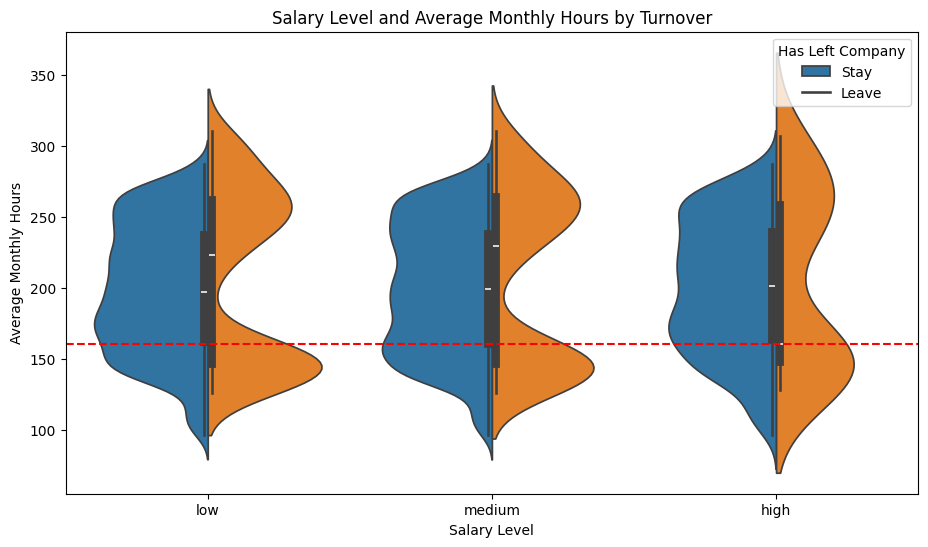

In [12]:
# Create violin plot
plt.figure(figsize=(11, 6))
sns.violinplot(x="salary_level", y="avg_monthly_hours", hue="has_left_company", data=df, split=True)
plt.axhline(y=160, color="r", linestyle="--", label="Average 160hrs/month")
plt.title("Salary Level and Average Monthly Hours by Turnover")
plt.xlabel("Salary Level")
plt.ylabel("Average Monthly Hours")
plt.legend(labels=["Stay", "Leave"], title="Has Left Company")
plt.show()

From the graph:

- **Workload at different salary levels:** The shapes of the distributions for "low" and "medium" salary levels are similar, indicating that employees in these categories tend to work similar ranges of hours. This may suggest that wages are not proportional to hours worked, which may factor in employee dissatisfaction and turnover.

- **High-wage hours worked:** "High" pay levels also have a similar distribution shape, meaning that even high-wage employees work a similar range of hours as low-wage employees.

- **Tolerance for high workloads:** Some employees may be more tolerant and thrive under higher workloads. Their reasons for staying include high job satisfaction, commitment to the company, or external factors such as what they feel is adequate pay after overtime.

- **Need for in-depth analysis:** To understand why some employees stay despite heavy workloads, it's essential to conduct an in-depth analysis to identify factors contributing to their satisfaction and retention.

#### 2.3.4 Projects by Department

Explore the `num_of_projects` assignments across `departments` and their impact on employee turnover.

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:640: F

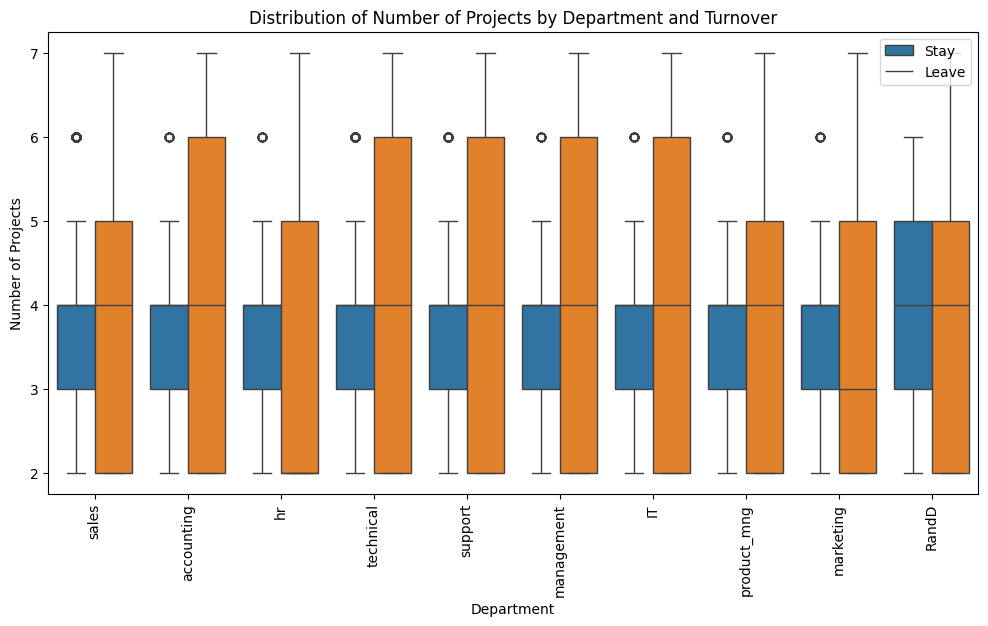

In [13]:
# Create cat plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Department", y="number_of_projects", hue="has_left_company", data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap or are too long
plt.title("Distribution of Number of Projects by Department and Turnover")
plt.xlabel("Department")
plt.ylabel("Number of Projects")
plt.legend(labels=["Stay", "Leave"], loc="upper right")
plt.show()


From the graph:

- **Higher Median Projects for Leavers:** There is a noticeable trend where the median number of projects for employees who left the company is higher than for those who stayed. 
- **Project Range for Leavers:** Employees who left the company have a wider range of project involvement, with some working on as few as 2 projects and others on as many as 7. 
- **Consistent Median for Stayers:** Employees who stayed seem to have a consistent median number of projects across departments, generally between 3 and 4. This consistency might indicate a balanced workload is maintained for retained employees.
- **High-Project Turnover:** Particularly noticeable is that almost all employees who worked on 5 or more projects have left, suggesting that those who are highly engaged in work or possibly overworked are more prone to leaving.
- **Department Impact:** While the department doesn't seem to be the main factor in project count for those who stayed, it appears to influence those who left. However, the trend of leavers having more projects is consistent across departments.
- **RandD Department Exception:** The RandD department stands out as an exception, where the number of projects does not differ much between those who have left and those who have stayed. 

Given the insights from the data, it appears that the choice of an employee to leave the company is not significantly influenced by the department they work in. The pattern of turnover is consistent across different departments, suggesting that departmental factors may not be the primary drivers of employee departure. Consequently, we can opt to exclude the `department` column from our predictive modeling as it may not provide substantial predictive power for employee turnover.


#### 2.3.5 Comprehensive Analysis

We will use a heatmap to represent all relationships.


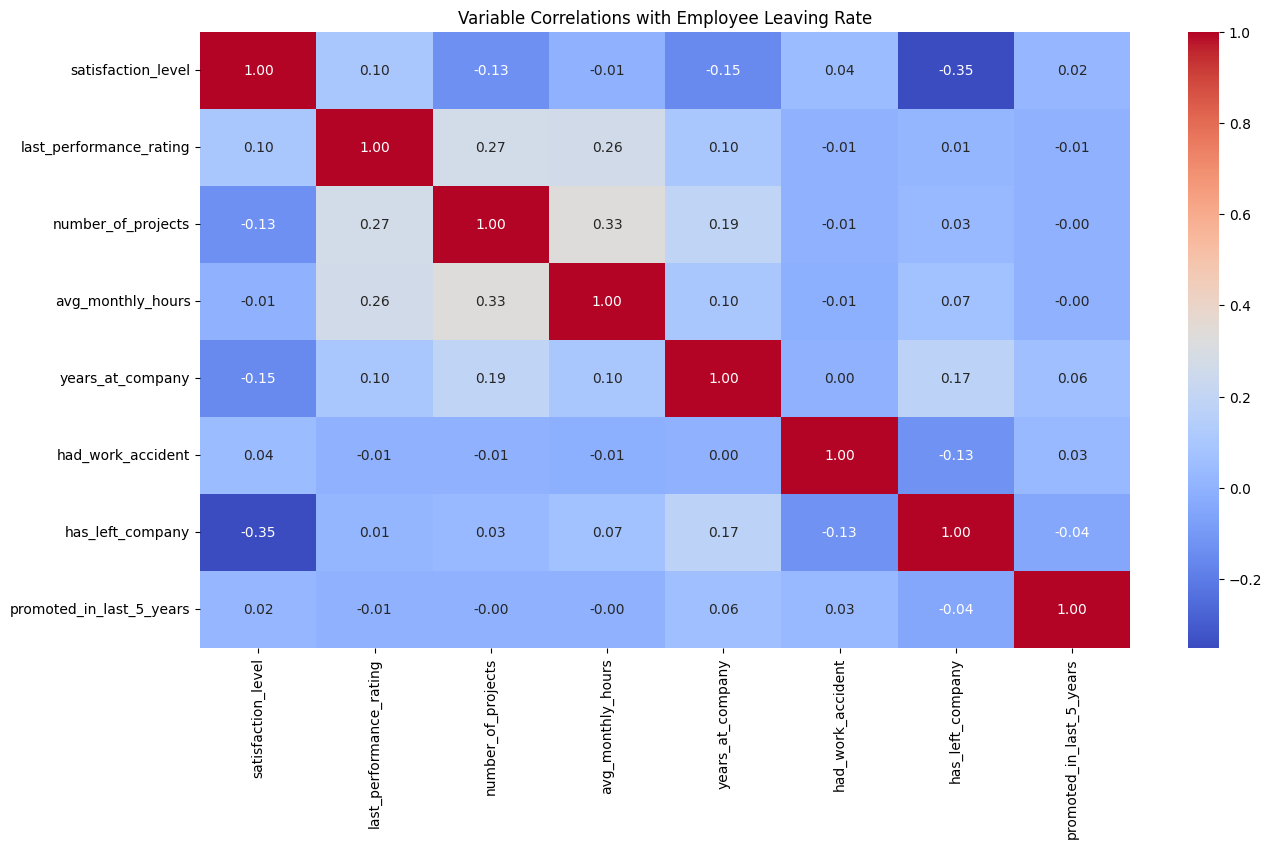

In [14]:
# Before we generate heat map, we should drop all columns contain string
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Variable Correlations with Employee Leaving Rate");

### 2.4 Graph Interpretation

Employees may decide to leave a company for several reasons. Based on an analysis of overall trends and discussions, here are some potential reasons why employees may choose to leave:

- **Lack of job satisfaction:** If employees feel that their job could be more fulfilling or that their job could effectively utilize their skills, they may seek a more satisfying position elsewhere.

- **Lack of career advancement:** A lack of advancement opportunities or feeling stuck in the same role can lead to frustration and a decision to leave to pursue career advancement.

- **Work-life balance:** Overwork and stress without adequate breaks can lead to burnout. If employees feel their work-life balance is unsustainable, they may leave.

- **Compensation issues:** If employees feel their jobs are unfairly compensated, especially compared to industry standards, they may leave for higher-paying opportunities.

- **Excessive Workload:** Our analysis indicates that employees handling a high number of projects, particularly those tackling five or more, are more likely to leave. This suggests that an excessive workload could be a significant factor in their decision to seek employment elsewhere.

Next, we will use a building model using decision tree to predict the depth of reasons why employees choose to leave and how to prevent them from leaving the company.

## **Construct**

- **Model Selection:**
    - Decision Tree model: Justify the choice based on the model's simplicity, interpretability, and suitability for the data.
    - Random Forest model: Expand the predictive capacity by leveraging an ensemble method that improves accuracy and controls overfitting better than a single decision tree.
    - XGBoost model: Implement this advanced gradient boosting algorithm for its efficiency, effectiveness, and ability to handle a wide variety of data science problems.
    - K Means: Employ K-means clustering to identify patterns of employee engagement.
 - **Validation:**
    - For the Decision Tree, continue to split the data into training and testing sets to validate the model's performance. Use metrics like K-Fold Cross-Validation and GridSearch for optimization.
    - For the Random Forest and XGBoost models, additionally apply techniques such as feature importance and parameter tuning to refine the models and improve accuracy.
- **Parameter Tuning:** 
    - Use GridSearchCV for the Random Forest to explore a wide range of combinations and identify the best hyperparameters for the ensemble.
    - For XGBoost, we can apply a more targeted approach with RandomizedSearchCV, focusing on key parameters like learning rate, max depth, and number of estimators.


### 3.1 Data Processing

We will start replacing `department` and `salary_level` with machine-readable numbers. 

In [15]:
# Replace "salary_level" columns with machine-readable numbers
df["salary_level"] = df["salary_level"].replace({"low": 0, "medium": 1, "high": 2})
# Change "department" columns to 0 and 1
df = pd.get_dummies(df, columns=["Department"], drop_first=True, dtype="uint8")
df

/tmp/ipykernel_3221/2145013097.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["salary_level"] = df["salary_level"].replace({"low": 0, "medium": 1, "high": 2})
/tmp/ipykernel_3221/2145013097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary_level"] = df["salary_level"].replace({"low": 0, "medium": 1, "high": 2})


,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,salary_level,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,3.8,5.3,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,8.0,8.6,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,1.1,8.8,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,7.2,8.7,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,3.7,5.2,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,9.0,5.5,3,259,10,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,7.4,9.5,5,266,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,8.5,5.4,3,185,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,3.3,6.5,3,172,10,0,0,1,2,0,0,0,0,1,0,0,0,0


Next, we use the data in the `has_left_company` column as the dependent variable, and the remaining columns as independent variables.

In [16]:
# Read data x and y
x = df.drop(columns="has_left_company")
y = df["has_left_company"]

print(x)
print(y)

       satisfaction_level  last_performance_rating  number_of_projects  \
0                     3.8                      5.3                   2   
1                     8.0                      8.6                   5   
2                     1.1                      8.8                   7   
3                     7.2                      8.7                   5   
4                     3.7                      5.2                   2   
...                   ...                      ...                 ...   
11995                 9.0                      5.5                   3   
11996                 7.4                      9.5                   5   
11997                 8.5                      5.4                   3   
11998                 3.3                      6.5                   3   
11999                 5.0                      7.3                   4   

       avg_monthly_hours  years_at_company  had_work_accident  \
0                    157                 3    

Next, we will divide training set and test set, all 3 model will use same split data set: 80% of data use for training and 20% of data use for testing, `random_state` will always be set to 1 in this project.

In [17]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train)
print(y_train)

       satisfaction_level  last_performance_rating  number_of_projects  \
4133                  5.2                      8.0                   5   
11072                10.0                      8.6                   2   
7693                  6.9                      8.2                   3   
3258                  4.8                      6.1                   3   
9139                  6.9                      6.8                   4   
...                   ...                      ...                 ...   
7822                  6.9                      7.6                   3   
10964                 5.2                      4.3                   3   
907                   0.9                      8.6                   6   
5201                  3.6                      7.3                   3   
235                   8.3                      8.5                   4   

       avg_monthly_hours  years_at_company  had_work_accident  \
4133                 234                 3    

### 3.2 Classification Decision Tree

#### 3.2.1 Model Initialization and Training

Because the independent variable has 9 features, we try to set the maximum depth of the tree to 4. We will then perform parameter tuning according to the situation.

In [18]:
# Initialize the model and set parameters
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

Now, we are finished with the construction of the decision tree.

Next, we can use the divided test set to make predictions and check the accuracy of the model predictions.

In [19]:
# Start predict
y_pred = model.predict(x_test)
# Print first 20
print(y_pred[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


According to the result, #14 will chose to leave. 

Next, we output the first 20 items of y_test of the test set for comparison to intuitively feel the accuracy of the prediction.

In [20]:
# Test
y_pred_20 = y_pred[:20]
print(y_pred_20)

y_true_20 = y_test[:20]
print(y_true_20.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


Great! The first 20 term has 100% accuracy! 
However, due to the large dataset, we can't determine by using human eyes, so we will use the `score()` function to test accuracy. 

#### 3.2.2 Classification Accuracy Function

In [21]:
# Find accuracy score
score = accuracy_score(y_pred, y_test, normalize=True)     
print(score)
score = accuracy_score(y_pred, y_test, normalize=False)
print(score)

0.9720716965402251
2332.0


We get an accuracy of 97.2% and 2332 rows of data in total, which matches. 

Then, pass the independent variable data of the test set to the `predict_proba()` function to predict the probability of classification and output the top 20 prediction results.

In [22]:
y_pred_proba = model.predict_proba(x_test)
print(y_pred_proba[0:20])

[[0.95581172 0.04418828]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.95581172 0.04418828]
 [0.99240146 0.00759854]
 [0.95581172 0.04418828]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.         1.        ]
 [0.99240146 0.00759854]
 [0.95581172 0.04418828]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.99240146 0.00759854]
 [0.95581172 0.04418828]]


In [23]:
# Read Column Data of an Array
# Get column 2 data of y_pred_proba
print(y_pred_proba[:,1])

[0.04418828 0.00759854 0.00759854 ... 1.         0.00759854 0.00759854]


By now, we have completed constructing and predicting the classification decision tree model and obtained the classification probability data.

Next, we will use data on classification probabilities to conduct a new evaluation of classification decision trees and perform automatic optimization of parameters.

#### 3.2.3 ROC Curve / AUC Value

##### 3.2.3.1 Hit Rate and False Alarm Rate

Hit rate, referred to as TPR.
> Indicates the proportion of people who are predicted to quit among the actual resignations.

False positive rate, referred to as FPR.
> Indicates the proportion of people who are predicted to leave their jobs among those who have not actually left their jobs.

##### 3.2.3.2 ROC Curve

The ROC curve is a curve drawn with the false positive rate as the abscissa and the hit rate as the ordinate.

In [24]:
# Import the roc_curve function, and then pass y_test and the predicted probability of resignation into roc_curve()
y_pred_proba = model.predict_proba(x_test)
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

print(fpr)
print(tpr)
print(thres)

[0.         0.         0.00554156 0.01813602 0.0302267  0.16221662
 0.21309824 0.22670025 0.99748111 1.        ]
[0.         0.26570048 0.64009662 0.92512077 0.92512077 0.95410628
 0.95652174 0.95652174 1.         1.        ]
[       inf 1.         0.95238095 0.83521445 0.07633588 0.04418828
 0.03317536 0.02298851 0.00759854 0.        ]


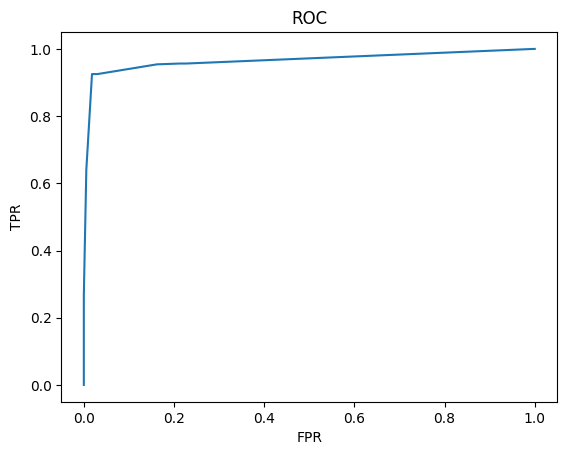

In [25]:
# Draw ROC Curve
plt.plot(fpr, tpr)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

From the graph, when the false positive rate FPR is between 0 and 0.2, the hit rate TPF is above 0.9, which is very close to 1.0.

Similar to this, a model with a small false positive rate and a high hit rate is a better model.

**The steeper the ROC curve, the better the model.**

##### 3.2.3.3 AUC Value

AUC value refers to the area under the ROC curve.

| AUC Range | Interpretation |
|-----------|----------------|
| 0.5-0.7   | Fair           |
| 0.7-0.85  | Good           |
| 0.85-1    | Excellent      |



In [26]:
# Find AUC Value
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.965733338200757

According to the output, the AUC value of the model is 0.966, which has a perfect prediction effect.

If we need to improve the prediction effect of the model further, we can perform parameter tuning: GridSearch and K-fold cross-validation.

#### 3.2.4 Parameter Tuning

GridSearch and K-fold cross-validation.

##### 3.2.4.1 K-Fold Cross-Validation

K-fold cross-validation divides the data equally into K parts, selects 1 part as the validation set each time, and the remaining K-1 parts are used as the cross-validation training set.

In [27]:
# Perform K-fold cross-validation
k_fold_auc_score = cross_val_score(model, x_train, y_train, scoring="roc_auc", cv=5)
print(k_fold_auc_score)
print(k_fold_auc_score.mean())

[0.97194343 0.97250705 0.97016309 0.97391102 0.9742665 ]
0.9725582175825391


##### 3.2.4.2 GridSearch

Automatically traverse all candidate parameters, loop to build and evaluate the model, and select the best parameters as the final result.

We can find best `max_depth` for the tree here.

In [28]:
# Perform Grid Search
parameters = {"max_depth": [1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(model, parameters, scoring="roc_auc", cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 4}

Excellent! 4 is the first number I chose initially; that's perfect! No re-modeling needed. 

But want to see different AUC value if use different tree height?

In [29]:
# Output AUC Value base on different max height
for i in [1,2,3,4,5,6,7,8,9]:
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)

    auc_score_loop = roc_auc_score(y_test, y_pred_proba[:,1])
    print(f"When max_depth={i}, the AUC value is {auc_score_loop.round(4)}")

When max_depth=1, the AUC value is 0.7565
When max_depth=2, the AUC value is 0.9029
When max_depth=3, the AUC value is 0.9619
When max_depth=4, the AUC value is 0.9657
When max_depth=5, the AUC value is 0.9701
When max_depth=6, the AUC value is 0.965
When max_depth=7, the AUC value is 0.9653
When max_depth=8, the AUC value is 0.9677
When max_depth=9, the AUC value is 0.9646


Finally, we can print out tree

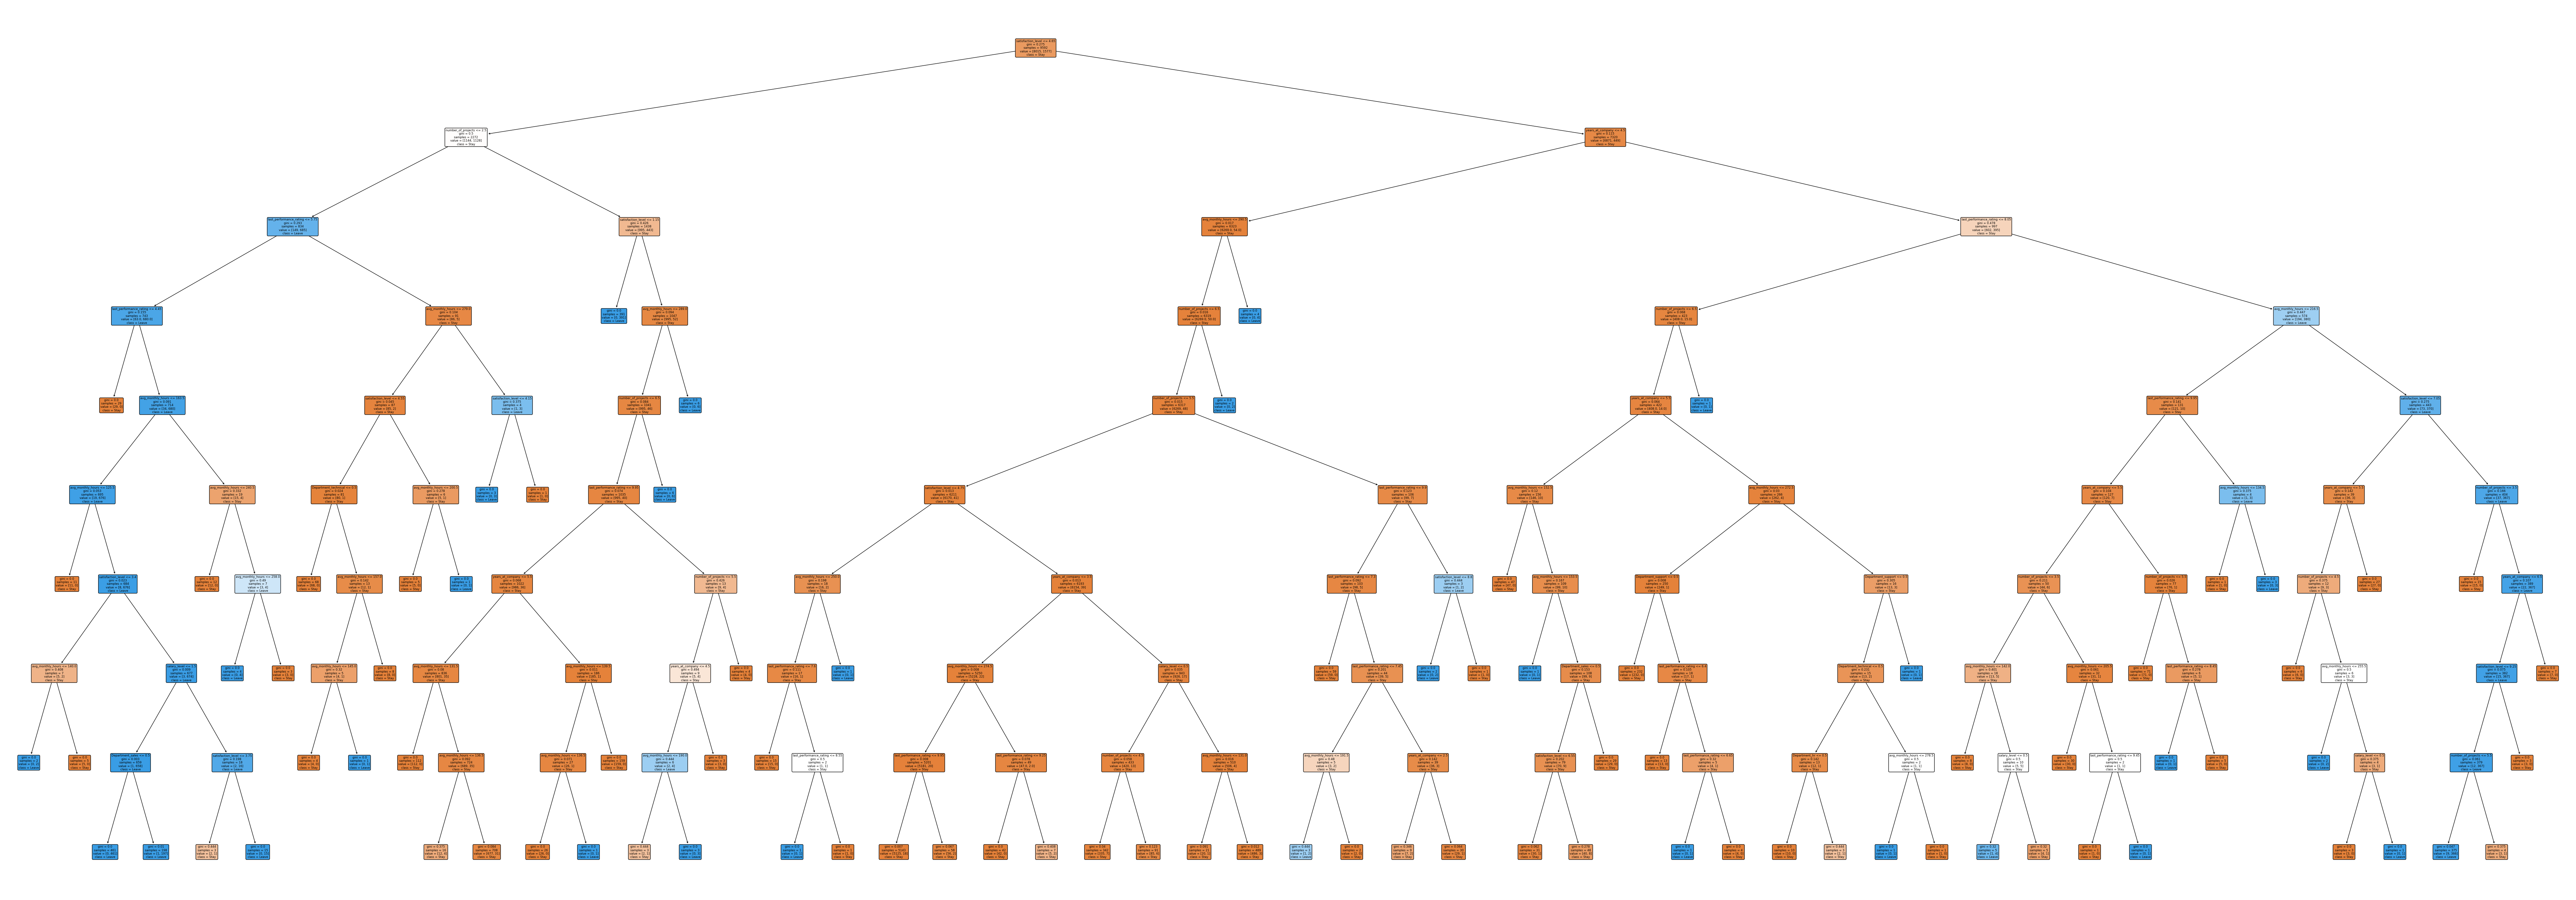

In [30]:
# Print tree
plt.figure(figsize=(100, 35))
plot_tree(model, 
          feature_names=x_train.columns, 
          class_names=["Stay", "Leave"], 
          filled=True, 
          impurity=True, 
          rounded=True)
plt.show()

#### 3.2.5 Department Exception

We have completed the modeling and prediction useing decision tree. However, I want to highlight an intriguing observation: when initially modeling (decision tree only) without considering the "department" variable, I chose to exclude it. Upon revisiting the model and incorporating "department" as a variable, I found that the results remained unchanged—there was no discernible difference.

The model you're reviewing in this Jupyter notebook includes the "department" feature. If you have any doubts about the impact of this variable, I encourage you to remove the `Department` column and rerun the analysis yourself. You can do this by reverting to section 3.1, substituting the `get_dummies()` function with the `drop()` function to eliminate the `department` column, and then observe the results.

If the inclusion of the 'department' variable does not influence the final results of the model, there could be several potential reasons for this observation:

- **Redundant Information:** The effect of the "department" variable may be captured by other variables in the dataset, making it redundant.
- **Lack of Discrimination:** The "department" factor might not be a strong discriminator for the outcome of interest, which, in this case, is whether an employee will leave the company.
- **Overlap with Other Features:** There may be an overlap in the information provided by the 'department' variable and other features, leading to no net gain in including it.

### 3.3 Random Forest

#### 3.3.1 RF Model Initialization and Training
Since we have already done split data, we will jump into model initialization and training directly.

In [31]:
# Initialize the rf model and set parameters
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

After training the Random Forest model, we can determine whether it makes accurate predictions and find accuracy score.

In [32]:
# Start predict
y_pred_rf = rf_model.predict(x_test)

# Find accuracy score
rf_score = accuracy_score(y_test, y_pred_rf)
rf_score

0.9837432263443101

This is an excellent accuracy score, but it might cause overfitting. We will use multiple ways to determine and re-evaluate the model later in this project. 


#### 3.3.2 Hyperparameter Tuning

We will need to set up a parameter distribution to sample from during fitting.

In [33]:
# Create parameter distribution
param_dist_rf = {"n_estimators": randint(50, 500),
                 "max_depth": randint(1, 20)}

# Create a random forest classifier
rf_for_tuning = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_rf = RandomizedSearchCV(rf_for_tuning, param_distributions=param_dist_rf, 
                                    n_iter=5, cv=5, random_state=1)

# Fit the random search object to the data
rand_search_rf.fit(x_train, y_train)

# Create a variable for the best model
best_rf = rand_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=13, n_estimators=122)

We get max depth is 13 and n_estimators is 122, this is the result of hyperparameter. 
Next, we will use this best para data to train model again.

In [34]:
# Train model using best para
best_rf_model = RandomForestClassifier(max_depth=13, n_estimators=122, random_state=1)
best_rf_model.fit(x_train, y_train)
y_pred_best_rf = best_rf_model.predict(x_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
accuracy_best_rf

0.984160066694456

As we can see, the accuracy of the Random Forest model with tuned hyperparameters is: 0.9842.

Obtaining an accuracy of 0.9842 after hyperparameter tuning, compared to 0.9833 before, shows a slight improvement in the model's predictive accuracy. Although the difference is small, it indicates that the tuned model may generalize slightly better when making predictions on new, unseen data. 


#### 3.3.3 Visualizing the Tree

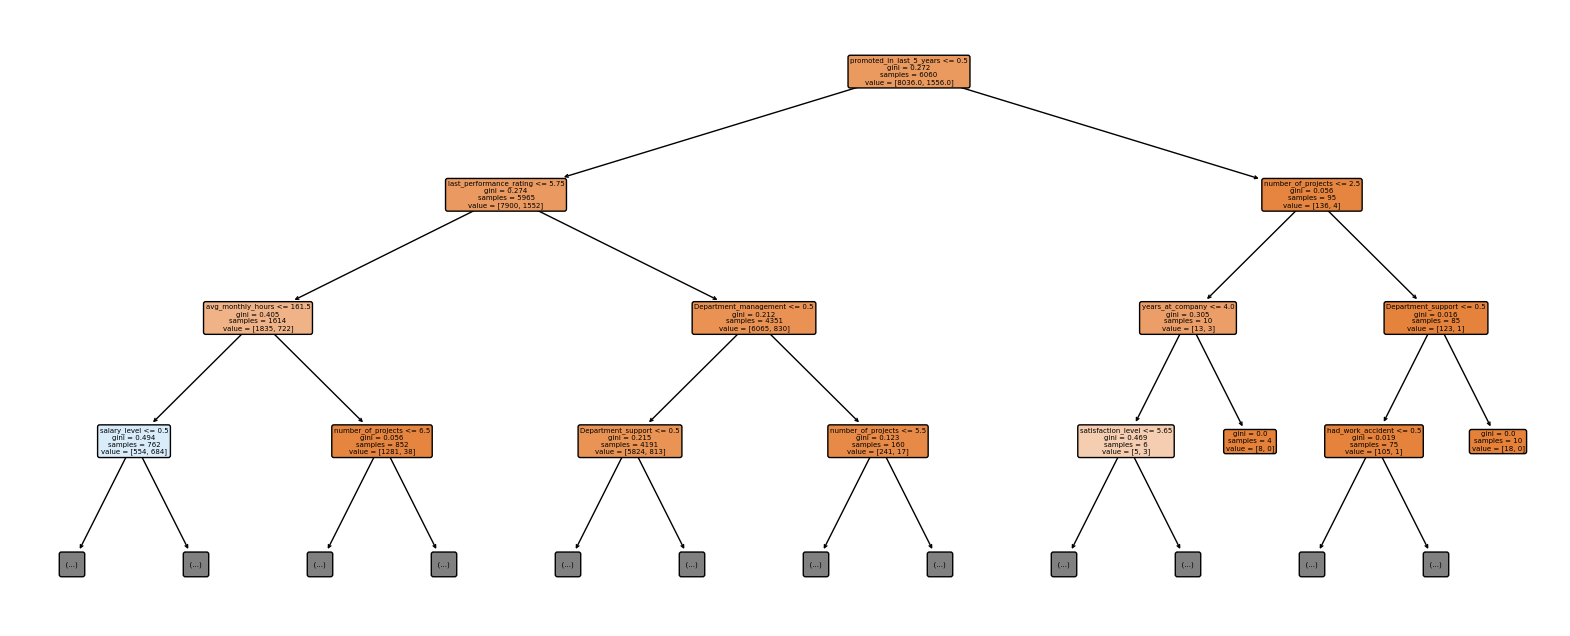

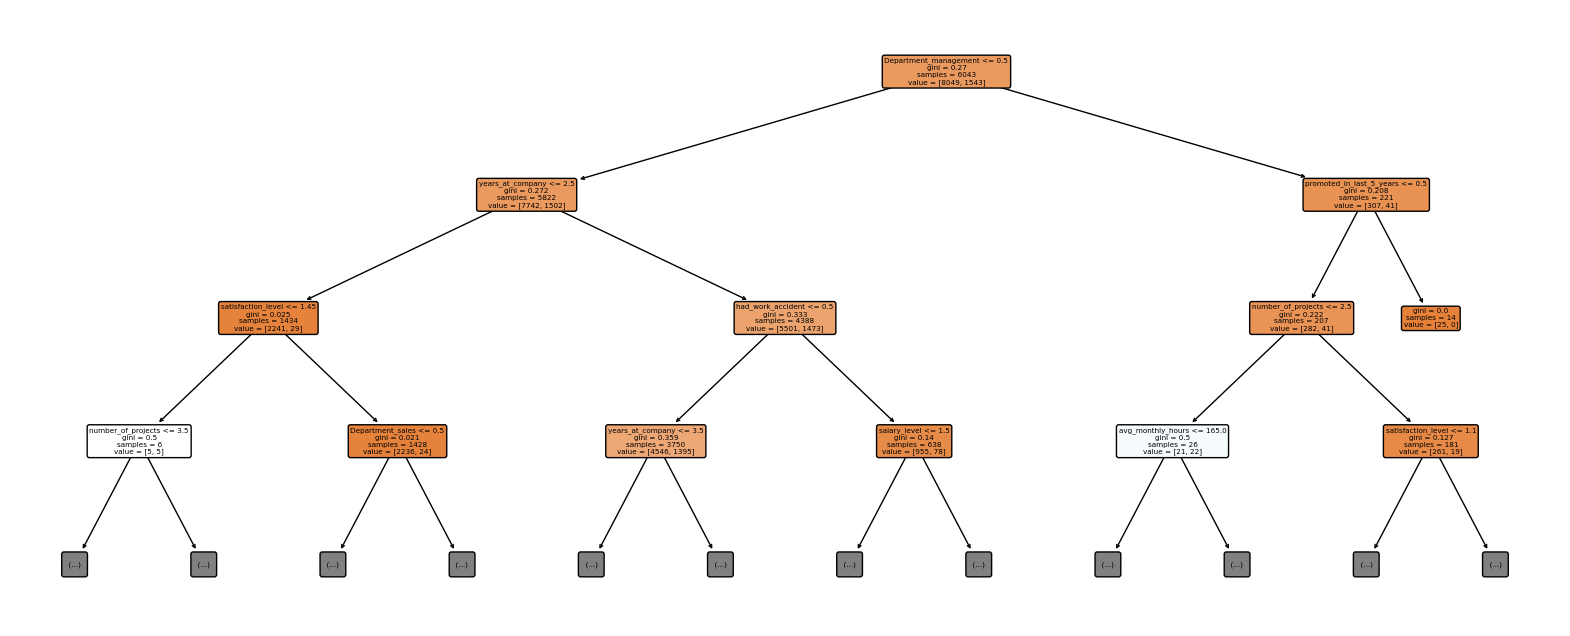

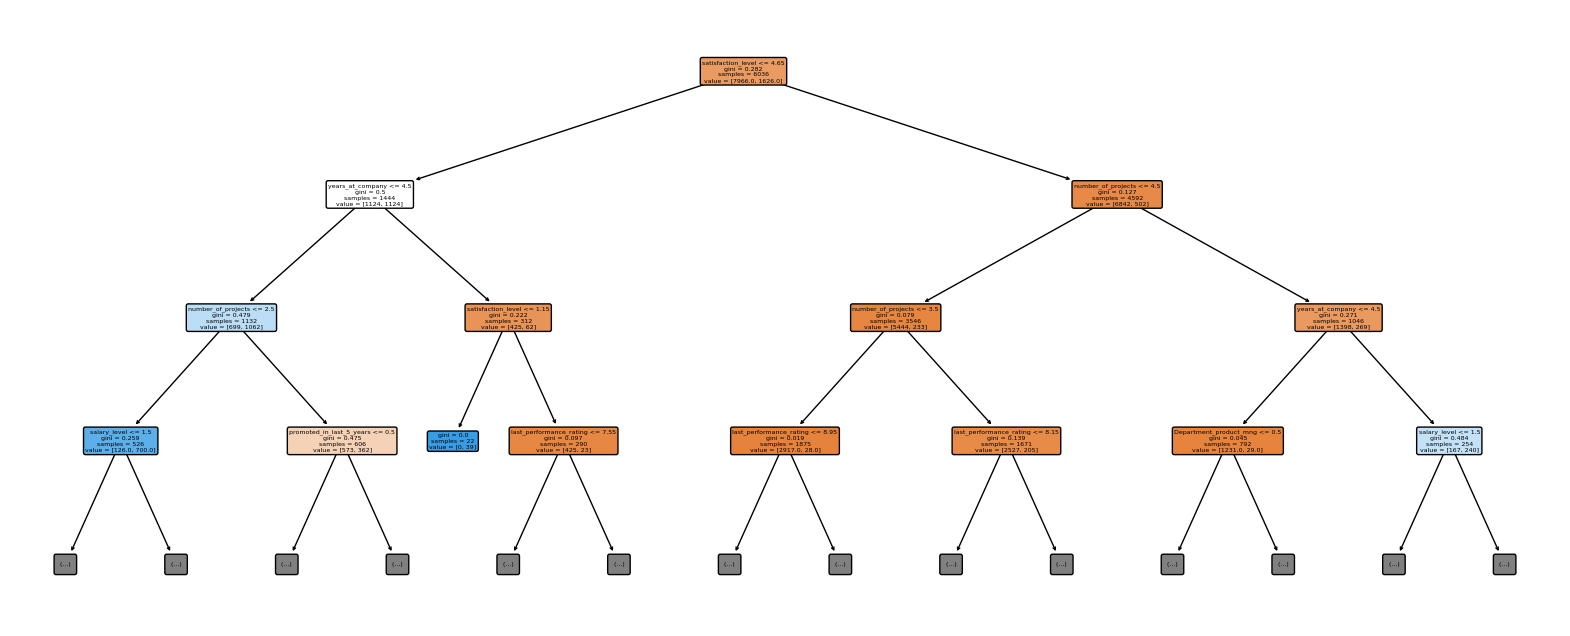

In [35]:
# Visualizing the Results
for i in range(3):
    tree = rf_model.estimators_[i]
    plt.figure(figsize=(20, 8))
    plot_tree(tree, filled=True, rounded=True, max_depth=3, feature_names=x_train.columns)
    plt.show()


#### 3.3.4 Evaluate Model

To avoid overfitting, we will use confusion matrix and multiple scores to evaluate this model. 

##### 3.3.4.1 Confusion Matrix

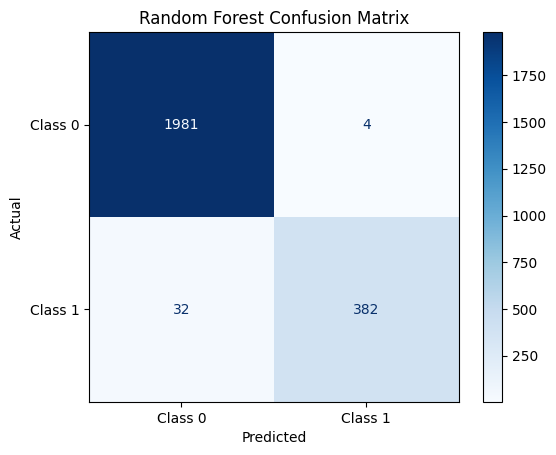

In [36]:
# Generate confusion matrix
y_pred_rf_cm = best_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf_cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

cmd.plot(cmap="Blues")
cmd.ax_.set(title="Random Forest Confusion Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()

The confusion matrix for the Random Forest model displays the following:
- **True Positives (TP):** The model accurately predicted 382 instances where employees left the company.
- **True Negatives (TN):** The model accurately predicted 1980 instances where employees stayed with the company.that's all
- **False Positives (FP):** The model incorrectly predicted 5 instances where employees would leave, but they actually stayed.
- **False Negatives (FN):** The model incorrectly predicted 32 instances where employees would stay, but they actually left.

##### 3.3.4.2 Scores

In [37]:
y_pred_proba_rf = rf_model.predict_proba(x_test)

# Define a function to get all scores
def get_score(y_true, y_pred_rf, y_pred_proba_rf):
    scores_rf = {}
    scores_rf["AUC"] = roc_auc_score(y_true, y_pred_proba_rf[:,1])
    scores_rf["Recall"] = recall_score(y_true, y_pred_rf)
    scores_rf["F1"] = f1_score(y_true, y_pred_rf)
    scores_rf["Precision"] = precision_score(y_true, y_pred_rf)
    return scores_rf

total_score = get_score(y_test, y_pred_rf, y_pred_proba_rf)
total_score


{'AUC': 0.9711161002202509,
 'Recall': 0.9178743961352657,
 'F1': 0.951188986232791,
 'Precision': 0.987012987012987}

All the scores are very high; we will conclude this in the end.

### 3.4 XGBoost

#### 3.4.1 XGB Model Initialization and Training
Since we have already done split data, we will jump into model initialization and training directly.

In [38]:
# Initialize and train the model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
# Start predict
y_pred_xgb = xgb_model.predict(x_test)

# Find accuracy score
xgb_score = accuracy_score(y_test, y_pred_xgb)
xgb_score

0.9829095456440183

#### 3.4.2 Hyperparameter Tuning

In [40]:
# Create parameter distribution
param_dist_xgb = {"n_estimators": randint(100, 300),
                  "max_depth": randint(3, 10),
                  "learning_rate": [0.01, 0.05, 0.1]}

# Create a xgb boost classifier
xgb_for_tuning = XGBClassifier()

# Use random search to find the best hyperparameters
rand_search_xgb = RandomizedSearchCV(xgb_for_tuning, param_distributions=param_dist_xgb, 
                                     n_iter=10, cv=5, random_state=1)

# Fit the random search object to the data
rand_search_xgb.fit(x_train, y_train)

best_xgb = rand_search_xgb.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=240, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

We get max depth is 6, n_estimators is 240 and learning rate is 0.05, this is the result of hyperparameter. 
Next, we will use this best para data to train model again.

In [41]:
# Train model using best para
best_xgb_model = XGBClassifier(max_depth=6, n_estimators=240, learning_rate=0.05, random_state=1)
best_xgb_model.fit(x_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(x_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_rf)
accuracy_best_xgb

0.984160066694456

After hyperparameter tuning of the XGBoost model, we achieved an accuracy of approximately 98.416%.



#### 3.4.3 Evaluate Model

To avoid overfitting, we will use confusion matrix and multiple scores to evaluate this model. 

##### 3.4.3.1 Confusion Matrix

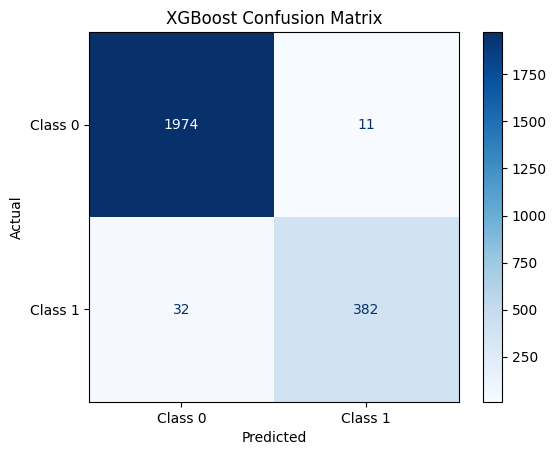

In [42]:
# Generate confusion matrix
y_pred_xgb_cm = best_xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_xgb_cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

cmd.plot(cmap="Blues")
cmd.ax_.set(title="XGBoost Confusion Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()

The confusion matrix for the XGBoost model displays the following:
- **True Positives (TP):** The model accurately predicted 382 instances where employees left the company.
- **True Negatives (TN):** The model accurately predicted 1974 instances where employees stayed with the company.
- **False Positives (FP):** The model incorrectly predicted 11 instances where employees would leave, but they actually stayed.
- **False Negatives (FN):** The model incorrectly predicted 32 instances where employees would stay, but they actually left.

##### 3.4.3.2 Scores

In [43]:
y_pred_proba_xgb = xgb_model.predict_proba(x_test)

# Define a function to get all scores
def get_score(y_true, y_pred_xgb, y_pred_proba_xgb):
    scores_xgb = {}
    scores_xgb["AUC"] = roc_auc_score(y_true, y_pred_proba_xgb[:,1])
    scores_xgb["Recall"] = recall_score(y_true, y_pred_xgb)
    scores_xgb["F1"] = f1_score(y_true, y_pred_xgb)
    scores_xgb["Precision"] = precision_score(y_true, y_pred_xgb)
    return scores_xgb

total_score = get_score(y_test, y_pred_xgb, y_pred_proba_xgb)
total_score


{'AUC': 0.9762871293152753,
 'Recall': 0.9227053140096618,
 'F1': 0.9490683229813665,
 'Precision': 0.9769820971867008}

All the scores are very high; we will conclude this in the end.

### 3.5 K-Means

Next, we will apply K-means clustering to uncover patterns of employee engagement. Although salary level would have been an ideal metric, its non-continuous nature in our dataset prompts us to instead focus on three continuous variables: `avg_monthly_hours`, `satisfaction_level`, and `last_performance_rating`.

#### 3.5.1 Data Normalization

In [44]:
# Set dependent variable
x = df[["avg_monthly_hours", "satisfaction_level", "last_performance_rating"]]

# Data Normalization
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Convert 2D array to Dataframe table
x_scale = pd.DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale

,avg_monthly_hours,satisfaction_level,last_performance_rating
0,-0.892208,-1.035668,-1.108990
1,1.262709,0.706637,0.851380
2,1.467939,-2.155721,0.970190
3,0.462311,0.374770,0.910785
4,-0.851162,-1.077151,-1.168396
...,...,...,...
11995,1.201140,1.121472,-0.990180
11996,1.344801,0.457736,1.386026
11997,-0.317563,0.914054,-1.049585
11998,-0.584363,-1.243085,-0.396129


#### 3.5.2 Build Model

In [45]:
# Build K means model
k_model = KMeans(n_clusters=3, random_state=1)  # n_clusters is select randonly at first, we will choice 3 as start point

# Train model
k_model.fit(x_scale)

# Get result
print(f"Centroid: {k_model.cluster_centers_}")
print(f"Label: {k_model.labels_}")
print(f"SSE: {k_model.inertia_}")

Centroid: [[ 0.29113156  0.65107834  0.52648431]
 [-0.81328113 -0.24641914 -0.86378472]
 [ 0.96876809 -1.4045162   0.37345956]]
Label: [1 0 2 ... 1 1 1]
SSE: 19275.11798755808


#### 3.5.3 Best K-Means Value

[35973.00000000014, 26245.292802306813, 19275.11798755808, 15260.69661003079, 11938.094769237565, 10227.745043725181, 9242.432920831643, 8380.92422142508, 8002.557754695127]


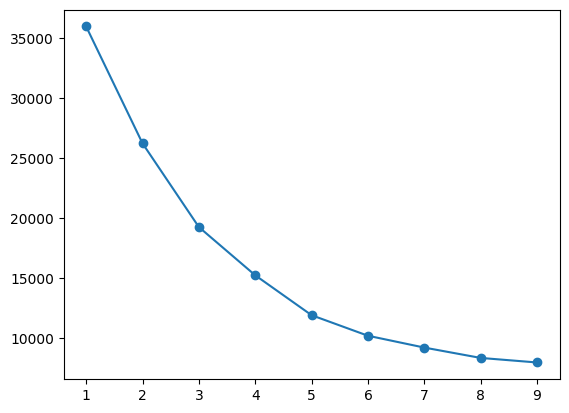

In [46]:
# Elbow method
sseList = []

for k in range(1, 10):
    k_model = KMeans(n_clusters=k, random_state=1)
    k_model.fit(x_scale)
    sseList.append(k_model.inertia_)

print(sseList)

# Plot graph
plt.plot(range(1, 10), sseList, marker="o")
plt.show()

The graph does not present a clear and distinct elbow point, therefore the closest approximate value for k is chosen to be 4.

#### 3.5.4 3D Scatter Plot

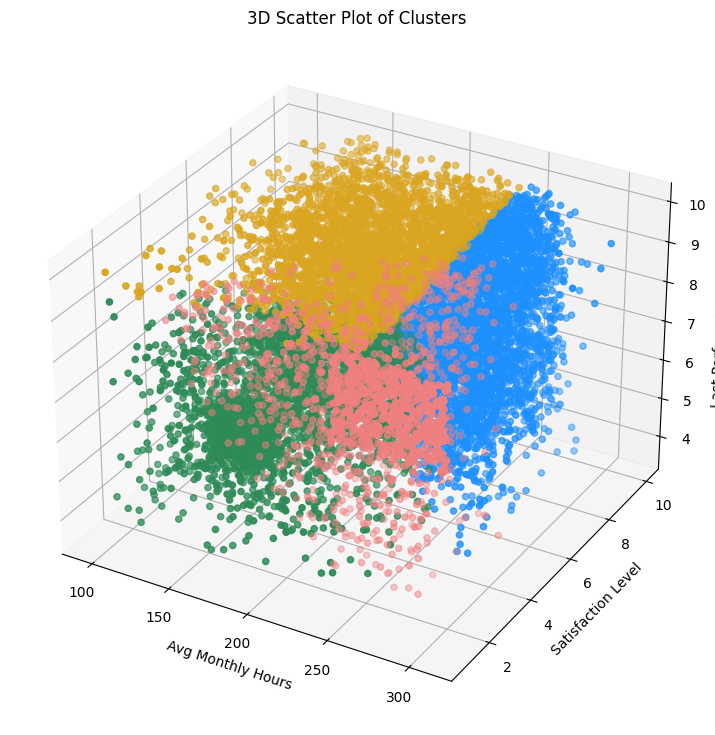

In [47]:
# K value is 4
k_model = KMeans(n_clusters=4, random_state=1)
k_model.fit(x_scale)
labels = k_model.labels_

# Create canvas and 3D axis objects
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection="3d")

# Plot 3D graph
color = ["dodgerblue", "seagreen", "lightcoral", "goldenrod"]

for i in range(0,4):
    d = x[labels == i]
    ax.scatter(d["avg_monthly_hours"], d["satisfaction_level"], d["last_performance_rating"], color=color[i])

plt.title("3D Scatter Plot of Clusters")
ax.set_xlabel("Avg Monthly Hours")
ax.set_ylabel("Satisfaction Level")
ax.set_zlabel("Last Performance Rating")
plt.show()



We will now move on execute part. 

## **Execute**

- **Results Interpretation:** Analyze the results to identify the most significant predictors of employee turnover. Understand how different variables interact and influence the outcome.
- **Conclusion and Recommendations:** Draw conclusions based on the model's findings. Propose actionable recommendations for reducing employee turnover.
- **Feedback and Iteration:** Provide feedback to stakeholders to make the company better - reduce the employee churn rate. 

### 4.1 Model Interpretation

#### 4.4.1 Data Summary

We have developed three predictive models to assess employee turnover: a Decision Tree (DC), a Random Forest (RF), and an XGBoost (XGB) model. Each model offers insights into employee behavior, with varying degrees of accuracy and performance. Below is the performance summary of each model:

**Decision Tree (DC)**
- Accuracy Score: 97.21%
- AUC Score: 96.57%

**Random Forest (RF)**
- Accuracy Score: 98.33%
- AUC Score: 97.72%
- Recall: 92.03%
- F1 Score: 95.01%
- Precision: 98.20%

Confusion Matrix Analysis:
- High accuracy in predicting both classes with a very low false positive rate.
- Captured most of the employees who left, with some being missed (false negatives).


**XGBoost (XGB)**
- Accuracy Score: 98.29%
- AUC Score: 97.63%
- Recall: 92.27%
- F1 Score: 94.91%
- Precision: 97.70%

Confusion Matrix Analysis:
- Slightly lower accuracy in predicting employees who stayed compared to RF.
- Comparable performance to RF in identifying employees who left, with a slightly higher false positive rate.

**K-Means**
- **Green Cluster Employees:** Balanced average on both average monthly hours and last performance rating but have a lower satisfaction level.
- **Pink Cluster Employees:** Characterized by higher average monthly hours, these employees have a lower satisfaction level yet a high performance rating. 
- **Blue Cluster Employees:** Wide range of performance ratings and satisfaction levels, but consistently report high average monthly hours. 
- **Gold Cluster Employees:** Exhibit high performance ratings with mixed satisfaction levels and average to slightly lower monthly hours.

#### 4.4.2 Insights
- Random Forest (RF) stands out as the best model, with the highest accuracy and AUC scores. It has a balanced performance across all metrics, making it robust for predicting employee turnover.
- XGBoost (XGB) follows closely, with similar scores but a slight increase in false positives.
- Decision Tree (DC), while slightly less accurate, offers a simpler and more interpretable model which might be beneficial for understanding basic turnover factors.
Based on the above findings, we recommend the Random Forest (RF) model for deployment due to its superior performance and reliability in prediction. 

The XGBoost (XGB) model should not be dismissed, as it provides a good balance between complexity and performance, and with further tuning, it might yield even better results.

In conclusion, while all models provide valuable insights into employee turnover, the Random Forest model is the most suitable for this application due to its high accuracy and low rate of false predictions. It will serve as a robust tool for identifying potential leavers and informing retention strategies.

### 4.2 Suggestions/Recommendations

#### 4.2.1 Predictive Model

- **Refine Workload Management:** Balance workloads across all models and ensure that no employee consistently endures excessive hours. This is crucial since all models indicate a link between high average monthly hours and turnover.
- **Foster Professional Growth:** Strengthen career advancement frameworks to provide clear and attainable growth opportunities. Our analysis across all models confirms that lack of promotion is a strong turnover predictor.
- **Boost Job Satisfaction and Performance:** Develop programs to increase job satisfaction and address performance-related issues, as highlighted by the decision tree model. The insights from the more complex RF and XGB models support these findings and suggest that deeper, more nuanced factors may also play a role.
- **Project Allocation Scrutiny:** Monitor the number of projects assigned to employees. The decision tree model identified a higher project count as a risk factor for turnover, a pattern that was less pronounced but still observable in RF and XGB models.

#### 4.2.2 K-Means

- **Green Cluster Employees:** It is advisable to investigate the underlying factors contributing to this dissatisfaction. Enhancing workplace conditions, providing recognition, or offering professional development opportunities could improve their job satisfaction.
- **Pink Cluster Employees:** This group may be at risk of burnout due to high workload despite their strong performance. Recommendations include reviewing their workload, considering more flexible hours, or offering additional support and incentives to maintain their performance without sacrificing well-being.
- **Blue Cluster Employees:** This suggests a potential imbalance in work distribution or inefficiencies that need to be addressed. Strategies might involve optimizing work processes, reassessing task allocations, or providing time management training to ensure that high work hours translate into productivity and job satisfaction.
- **Gold Cluster Employees:** This suggests they are efficient and effective but may need incentives to increase satisfaction, such as opportunities for advancement, recognition of their efficiency, or involvement in more challenging projects to align with their high performance.

### 4.3 Conclusion

The comparative analysis of the decision tree, random forest, and XGBoost models underscores several key factors influencing employee turnover. While the decision tree offered foundational insights, the RF and XGB models unveiled a richer, more detailed landscape of turnover predictors. The nuanced differences between these models suggest that a multi-faceted approach to retention strategies might be necessary, considering not only the quantity but also the quality and complexity of workload and career development opportunities.

### 4.4 Feedback

The collective findings from the three models offer a robust starting point for strategic interventions. However, it is vital to recognize the limitations inherent in quantitative models and the need for human judgment in interpreting these results. Integrating quantitative insights with qualitative feedback will provide a more holistic view of employee turnover. It is also recommended to maintain a dynamic approach to retention strategies, revisiting and revising them regularly to adapt to an evolving workforce and organizational context.

## **What's Next...**

- **Performance Evaluation:** Evaluate the Decision Tree model to pinpoint where enhancements are needed.
- **Model Expansion:** Integrate advanced models for Random Forest and XGBoost, which offer a more robust framework for handling complex datasets and feature interactions.
- **Deployment Preparation:** Prepare the refined models for deployment, ensuring they are tuned for optimal performance in a production environment.